In [1]:
import pickle
from aemulusnu_massfunction.emulator_training import *
from aemulusnu_massfunction.fisher_utils import *


fiducial_log10_rel_step_size['nu_mass_ev'] = -1.5
fiducial_log10_rel_step_size['10^9 As'] = -2.3


fiducial_h = 0.6736
nu_mass_ev = 0.06
#(Plank 2018 table 2. TT,TE,EE+lowE+lensing  + neutrino mass put in by hand)
fiducial_cosmology = {'10^9 As':2.1,
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': 0.02237,
                      'omch2': 0.12,
                      'nu_mass_ev': nu_mass_ev,}



# #(Same as above but put in DES Y3 OmegaM and Sigma8)
print('DES Y3')
Ωmh2 =  0.339*fiducial_h**2 # Y3 3x2pt
Ωνh2 = nu_mass_ev/(93.14) #see astro-ph/0603494
#From the BBN seciton of DES Y3 paper
Ωbh2 = 2.195/100
Ωch2 = Ωmh2-Ωbh2-Ωνh2
fiducial_cosmology = {'10^9 As': 1.520813,  #from σ8 for DES Y3 3x2 and convert_sigma8_to_As.ipynb
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': Ωbh2,
                      'omch2': Ωch2,
                      'nu_mass_ev': nu_mass_ev,}



fiducial_cosmo_vals = get_cosmo_vals(fiducial_cosmology)
fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))







z_bin_edges = [0.2, 0.4, 0.6, 0.8, 1.0]
richness_bin_edges = [20., 30., 45., 60., 300.]



print(fiducial_cosmology)




DES Y3
{'10^9 As': 1.520813, 'ns': 0.9649, 'H0': 67.36, 'w0': -1, 'ombh2': 0.021949999999999997, 'omch2': 0.13122263790038222, 'nu_mass_ev': 0.06}


In [2]:
# varied = list(fiducial_cosmology.keys())
varied = ['10^9 As', 'ns', 'H0', 'ombh2', 'omch2', 'nu_mass_ev']


In [3]:
z_bin_edges = [0.2, 0.4, 0.6, 0.8, 1.0]
richness_bin_edges = [20., 30., 45., 60., 300.]

n_z = len(z_bin_edges) - 1
n_r = len(richness_bin_edges) - 1


In [4]:

dμdθ = {}
dμdθ_unflat = {}
parameter_changed = 'H0'

cluster_abundance_tinker_pos = None
cluster_abundance_tinker_neg = None
log10_rel_step_size = fiducial_log10_rel_step_size[parameter_changed]

fname_base = '/scratch/users/delon/aemulusnu_massfunction/cluster_abundance_tinker_fisher_changing_%s_log10rel_step%.4f_cosmo_'%(parameter_changed, log10_rel_step_size)
fname_base = '/scratch/users/delon/aemulusnu_massfunction.2024-08-15/cluster_abundance_tinker_fisher_changing_%s_log10rel_step%.4f_cosmo_'%(parameter_changed, log10_rel_step_size)

for key in fiducial_cosmology:
    ckey = key
    if key == '10^9 As':
        ckey = '1e9As'
    fname_base += '%s_%f_'%(ckey, fiducial_cosmology[key])

fname_base = list(fname_base)

for i,char in enumerate(fname_base):
    if(char == '.'):
        fname_base[i] = 'p'

fname_base = fname_base[:-1]

fname_base = ''.join(fname_base)

with open(fname_base, 'rb') as file:
    cluster_abundance_tinker_pos = pickle.load(file)
with open(fname_base+'_neg', 'rb') as file:
    cluster_abundance_tinker_neg = pickle.load(file)
h = np.abs(fiducial_cosmology[parameter_changed]) * 10**log10_rel_step_size
tmp_theory_deriv = (cluster_abundance_tinker_pos - cluster_abundance_tinker_neg) / (2 * h)
flattened_theory_deriv = np.zeros((n_z * n_r))
for i in range(n_z):
    for a in range(n_r):
        flattened_theory_deriv[i * n_r + a] = tmp_theory_deriv[i, a]
dμdθ[parameter_changed] = flattened_theory_deriv
dμdθ_unflat[parameter_changed] = tmp_theory_deriv

In [5]:
dμdθ = {}
dμdθ_unflat = {}
parameter_changed = 'H0'

cluster_abundance_pos = None
cluster_abundance_neg = None
log10_rel_step_size = fiducial_log10_rel_step_size[parameter_changed]

fname_base = '/scratch/users/delon/aemulusnu_massfunction/cluster_abundance_fisher_changing_%s_log10rel_step%.4f_cosmo_'%(parameter_changed, log10_rel_step_size)
fname_base = '/scratch/users/delon/aemulusnu_massfunction/cluster_abundance_fisher_changing_%s_log10rel_step%.4f_cosmo_'%(parameter_changed, log10_rel_step_size)

for key in fiducial_cosmology:
    ckey = key
    if key == '10^9 As':
        ckey = '1e9As'
    fname_base += '%s_%f_'%(ckey, fiducial_cosmology[key])

fname_base = list(fname_base)

for i,char in enumerate(fname_base):
    if(char == '.'):
        fname_base[i] = 'p'

fname_base = fname_base[:-1]

fname_base = ''.join(fname_base)

with open(fname_base, 'rb') as file:
    cluster_abundance_pos = pickle.load(file)
with open(fname_base+'_neg', 'rb') as file:
    cluster_abundance_neg = pickle.load(file)
h = np.abs(fiducial_cosmology[parameter_changed]) * 10**log10_rel_step_size
tmp_theory_deriv = (cluster_abundance_pos - cluster_abundance_neg) / (2 * h)
flattened_theory_deriv = np.zeros((n_z * n_r))
for i in range(n_z):
    for a in range(n_r):
        flattened_theory_deriv[i * n_r + a] = tmp_theory_deriv[i, a]
dμdθ[parameter_changed] = flattened_theory_deriv
dμdθ_unflat[parameter_changed] = tmp_theory_deriv


In [6]:
np.log10(cluster_abundance_pos)

array([[3.86983682, 3.42390813, 2.82223471, 2.56802205],
       [3.93619013, 3.41992678, 2.74034879, 2.38269893],
       [3.81022145, 3.21312727, 2.44334262, 1.97632926],
       [3.57452891, 2.88913172, 2.01949362, 1.44035904]])

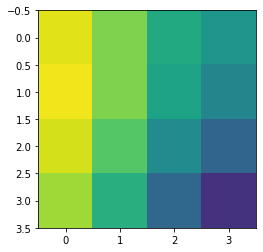

In [7]:
plt.imshow(np.log10(cluster_abundance_pos), vmin=1, vmax=4)

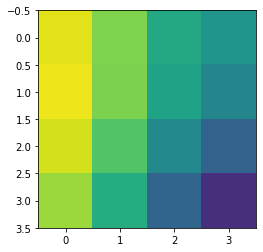

In [8]:
plt.imshow(np.log10(cluster_abundance_tinker_pos), vmin=1, vmax=4)

In [9]:
frac_diff = (cluster_abundance_tinker_pos-cluster_abundance_pos)/cluster_abundance_tinker_pos
frac_diff

array([[-0.01416284, -0.01792856, -0.01932425, -0.01659737],
       [-0.02872781, -0.034687  , -0.0376888 , -0.03642347],
       [-0.04822627, -0.05598605, -0.06025139, -0.05987395],
       [-0.07081186, -0.07995127, -0.08523909, -0.08547727]])

In [10]:
# array([[-0.01733147, -0.02269284, -0.02629496, -0.02713159],
#        [-0.0330418 , -0.0410112 , -0.04674231, -0.04942675],
#        [-0.05384995, -0.06404118, -0.07160376, -0.07557862],
#        [-0.07779871, -0.08974813, -0.09889341, -0.10385203]])

In [11]:
frac_diff = (cluster_abundance_tinker_neg-cluster_abundance_neg)/cluster_abundance_tinker_neg
frac_diff

array([[-0.0066811 , -0.00896454, -0.00863647, -0.00340976],
       [-0.02140838, -0.0255693 , -0.02645071, -0.02242189],
       [-0.04082931, -0.04641644, -0.04811402, -0.04469913],
       [-0.06311096, -0.06971343, -0.07198651, -0.06887321]])

In [12]:
# array([[-0.00979195, -0.01373248, -0.01566892, -0.01405264],
#        [-0.02569272, -0.03193529, -0.03562331, -0.03559394],
#        [-0.04644575, -0.05455304, -0.05964377, -0.06061627],
#        [-0.07010145, -0.0796092 , -0.08582701, -0.08748954]])